In [1]:
# Import required libraries

import ast
import json

# Libraries used to handle DataFrames
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# NLP libraries
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Machine Learning libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Reading IMDB movies data
# low_memory=False is used to remove the warnings
movies_df = pd.read_csv("data/imdb/IMDb movies.csv", low_memory=False)

In [3]:
movies_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [5]:
# year column is of object type, we have to convert it to numeric
movies_df[['year']] = movies_df[['year']].apply(pd.to_numeric, errors='coerce') # Using errors='coerce' to convert String to NaN without giving error

In [6]:
# Display some Indian movies
movies_df[(movies_df["country"] == "India") & (movies_df["year"] > 2000) & (movies_df["year"] < 2010)]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
30345,tt0118578,Albela,Albela,2001.0,2001-04-20,"Comedy, Drama, Romance",145,India,Hindi,Deepak Sareen,...,"Govinda, Aishwarya Rai Bachchan, Jackie Shroff...","Tony (Govinda) works as a guide, helping touri...",3.7,695,NaN,NaN,NaN,NaN,7.0,1.0
34269,tt0169102,Lagaan - C'era una volta in India,Lagaan: Once Upon a Time in India,2001.0,2002-08-23,"Adventure, Drama, Musical",224,India,Hindi,Ashutosh Gowariker,...,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",The people of a small village in Victorian Ind...,8.1,102618,$ 6000000,$ 909043,$ 1724806,84.0,286.0,77.0
35322,tt0187279,Meri Biwi Ka Jawab Nahin,Meri Biwi Ka Jawab Nahin,2004.0,2004-07-02,"Action, Comedy, Romance",150,India,Hindi,"Pankaj Parashar, S.M. Iqbal",...,"Akshay Kumar, Sridevi, Gulshan Grover, Laxmika...",Ajay gets married to his childhood friend Durg...,3.9,654,NaN,NaN,NaN,NaN,3.0,1.0
36286,tt0205380,Sanam Teri Kasam,Sanam Teri Kasam,2009.0,2009-05-22,"Action, Drama, Romance",170,India,"Hindi, English",Lawrence D'Souza,...,"Saif Ali Khan, Atul Agnihotri, Pooja Bhatt, Sh...",A love triangle forms after a male finds his b...,5.0,136,NaN,NaN,NaN,NaN,2.0,1.0
37086,tt0222024,Hum Tumhare Hain Sanam,Hum Tumhare Hain Sanam,2002.0,2002-05-24,"Drama, Romance",174,India,Hindi,K.S. Adiyaman,...,"Shah Rukh Khan, Madhuri Dixit, Salman Khan, At...",Gopal's blissful married life with Radha blemi...,5.4,6317,NaN,NaN,$ 899867,NaN,18.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76308,tt4960754,Kadhal Sadugudu,Kadhal Sadugudu,2003.0,2003-04-13,"Action, Drama",138,India,"Hindi, Tamil, Telugu",V.Z. Dhorai,...,"Vikram, Priyanka Upendra, Prakash Raj, Alphons...",A man who does everything unintentionally is m...,5.7,146,NaN,NaN,NaN,NaN,1.0,9.0
77876,tt5508936,Vamshi,Vamshi,2008.0,2008-10-02,"Action, Drama",139,India,Kannada,Prakash,...,"Puneeth Rajkumar, Nikita Thukral, Lakshmi, Avi...","Vamshi, under the eye of his mother is living ...",7.2,193,INR 20000000,NaN,NaN,NaN,NaN,NaN
80393,tt6358182,Unnai Ninaithu,Unnai Ninaithu,2002.0,2002-05-10,Drama,163,India,Tamil,Vikraman,...,"Suriya, Laila, Sneha, Ramesh Khanna, Thalaivas...",A young man tries to explain to his lover that...,6.9,297,INR 2000000,NaN,NaN,NaN,NaN,NaN
81296,tt6832682,Shahjahan,Shahjahan,2001.0,2001-11-14,"Drama, Romance",156,India,Tamil,K.S. Ravi,...,"Joseph Vijay, Balaji, Banu Balasubramaniam, Ch...",Ashok is the guy people turn to for love advic...,6.7,377,NaN,NaN,NaN,NaN,2.0,NaN


In [7]:
# Now filter movies from USA and India only
movies_df = movies_df[movies_df['country'].str.contains("USA", na=False) | movies_df['country'].str.contains("India", na=False)]

# Also filter movies with English and Hindi as their language
# movies_df = movies_df[movies_df['language'].str.contains("English", na=False) | movies_df['language'].str.contains("Hindi", na=False) | movies_df['language'].str.contains("Telugu", na=False)]
movies_df = movies_df[movies_df['language'].str.contains("English", na=False) | movies_df['language'].str.contains("Hindi", na=False)]

# Filter movies which have came after or in year 1970 to reduce dataframe size
movies_df = movies_df[movies_df['year'] >= 1970]

movies_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4334,tt0035423,Kate & Leopold,Kate & Leopold,2001.0,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,"Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",An English Duke from 1876 is inadvertedly drag...,6.4,77852,$ 48000000,$ 47121859,$ 76019048,44.0,341.0,115.0
10630,tt0054724,Zombie,Zombie,1971.0,1971-10-29,Horror,92,USA,English,Del Tenney,...,"William Joyce, Heather Hewitt, Walter Coy, Dan...",A cancer researcher on a remote Caribbean isla...,3.5,1214,NaN,NaN,NaN,NaN,56.0,40.0
12814,tt0060951,A Scream in the Streets,A Scream in the Streets,1973.0,1973-11-01,"Action, Crime",96,USA,English,"Carl Monson, Dwayne Avery",...,"Joshua Bryant, Frank Bannon, Rosie Stone, Lind...",Two Los Angeles detectives are assigned to tra...,4.7,233,NaN,NaN,NaN,NaN,10.0,12.0
13015,tt0061592,Doomsday Machine,Doomsday Machine,1972.0,1972,Sci-Fi,83,USA,English,"Harry Hope, Lee Sholem",...,"Bobby Van, Ruta Lee, Mala Powers, James Craig,...",Spies discover that the Red Chinese have built...,2.5,951,NaN,NaN,NaN,NaN,44.0,16.0
13397,tt0062730,The Big Snatch,The Big Snatch,1971.0,1971-06-01,"Crime, Drama",77,USA,English,"Dan Martin, Byron Mabe",...,"Harry Chest, Momo, Peggy Church, Tracy Handfus...",Guy in a pickup truck kidnaps 5 women off the ...,5.0,142,$ 11000,NaN,NaN,NaN,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85812,tt9860860,Abduction 101,Abduction 101,2019.0,2019-06-25,Horror,77,USA,English,"Robin Entreinger, Steve Noir",...,"Luna Labelle, Nixi Oblivion, Brianna Shewbert ...",Three beautiful women find a strange house in ...,2.3,174,$ 500000,NaN,NaN,NaN,14.0,3.0
85830,tt9887580,Bulletproof 2,Bulletproof 2,2020.0,2020-01-07,"Action, Comedy",97,USA,English,Don Michael Paul,...,"Faizon Love, Kirk Fox, Tony Todd, Cassie Clare...","Set 25 years after, Jack is now working as a S...",3.5,326,NaN,NaN,NaN,NaN,18.0,5.0
85837,tt9894470,VFW,VFW,2019.0,2020-02-14,"Action, Crime, Horror",92,USA,English,Joe Begos,...,"Stephen Lang, William Sadler, Fred Williamson,...",A group of old war veterans put their lives on...,6.1,4178,NaN,NaN,$ 23101,72.0,83.0,94.0
85838,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019.0,2019-04-18,"Animation, Adventure, Family",108,USA,English,Robert Fernandez,...,"David Thorpe, John Rhys-Davies, Kristyn Getty,...","An epic journey, faithfully adapted to modern-...",5.7,442,NaN,$ 1294596,$ 3173282,NaN,28.0,3.0


In [9]:
# Display year wise movie counts
movies_df.year.value_counts().sort_index()

1970.0     218
1971.0     224
1972.0     219
1973.0     236
1974.0     216
1975.0     194
1976.0     207
1977.0     208
1978.0     191
1979.0     202
1980.0     218
1981.0     211
1982.0     233
1983.0     215
1984.0     268
1985.0     283
1986.0     318
1987.0     389
1988.0     417
1989.0     418
1990.0     374
1991.0     371
1992.0     367
1993.0     417
1994.0     432
1995.0     476
1996.0     480
1997.0     537
1998.0     558
1999.0     615
2000.0     553
2001.0     583
2002.0     570
2003.0     549
2004.0     588
2005.0     720
2006.0     832
2007.0     823
2008.0     827
2009.0     883
2010.0     828
2011.0     891
2012.0     971
2013.0    1127
2014.0    1091
2015.0    1092
2016.0    1184
2017.0    1193
2018.0    1180
2019.0     983
2020.0     352
Name: year, dtype: int64

<AxesSubplot:>

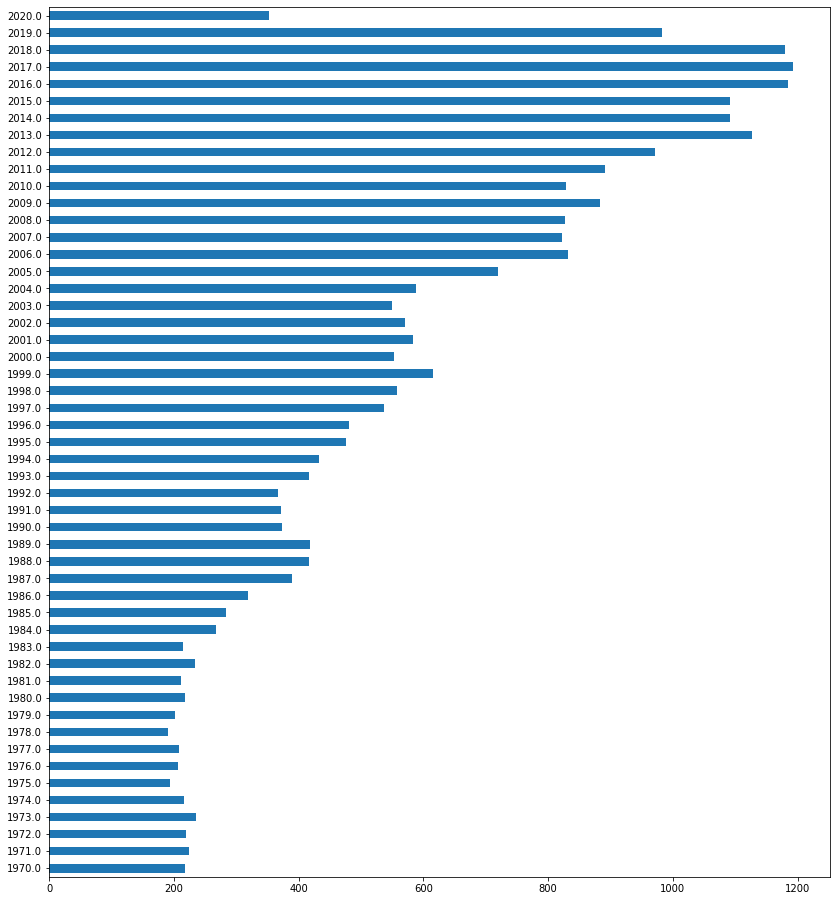

In [10]:
# Histogram of year wise movies
movies_df.year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(14,16))

In [11]:
print("Existing count of movies: ", movies_df.shape[0])
movies_df["year"].isnull().any() # print True
# movies_df = movies_df[df['EPS'].notna()]

Existing count of movies:  27532


False

In [12]:
# Read movie ratings data 
ratings_df = pd.read_csv("data/imdb/IMDb ratings.csv")
print(ratings_df.columns)
ratings_df.head()

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [13]:
print("Ratings DataFrame count: ", ratings_df.shape[0])

Ratings DataFrame count:  85855


In [14]:
# Join movie and rating dataframe based on `imdb_title_id` column
df = movies_df.merge(ratings_df, on="imdb_title_id", how="inner")
print("Movies DF count after join with rating DF: ", df.shape[0])
df.head()

Movies DF count after join with rating DF:  27532


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0035423,Kate & Leopold,Kate & Leopold,2001.0,2002-03-01,"Comedy, Fantasy, Romance",118,USA,"English, French",James Mangold,...,6.5,15654.0,6.7,3753.0,6.1,468.0,6.4,14831.0,6.3,38534.0
1,tt0054724,Zombie,Zombie,1971.0,1971-10-29,Horror,92,USA,English,Del Tenney,...,3.4,58.0,3.8,36.0,3.0,94.0,3.6,591.0,3.3,350.0
2,tt0060951,A Scream in the Streets,A Scream in the Streets,1973.0,1973-11-01,"Action, Crime",96,USA,English,"Carl Monson, Dwayne Avery",...,5.6,6.0,5.0,4.0,4.5,33.0,5.1,78.0,4.7,98.0
3,tt0061592,Doomsday Machine,Doomsday Machine,1972.0,1972,Sci-Fi,83,USA,English,"Harry Hope, Lee Sholem",...,3.0,23.0,3.1,36.0,2.6,99.0,2.7,455.0,2.3,315.0
4,tt0062730,The Big Snatch,The Big Snatch,1971.0,1971-06-01,"Crime, Drama",77,USA,English,"Dan Martin, Byron Mabe",...,5.3,3.0,7.0,2.0,5.1,18.0,5.2,47.0,4.7,60.0


## Using Weighted Average:

**Here we will calculate rating for movie using a techinique called weighted average**

IMDB follows weighted average rating method instead of just average rating:

* https://help.imdb.com/article/imdb/track-movies-tv/weighted-average-ratings/GWT2DSBYVT2F25SK?ref_=helpsect_cons_2_8#
* http://trailerpark.weebly.com/imdb-rating.html?source=post_page


![Weighted Average Rating Formula](images/wt_avg_rat.png)

We can calculate our manual weighted average using this below logic:

In [15]:
v = df["total_votes"]
R = df["mean_vote"]
C = df["mean_vote"].mean()
m = df["total_votes"].quantile(0.70) # Should have more than 70% of votes
df["wa"] = ((R*v)+(C*m))/(v+m)
# Display movies in descending order of calculated weighted average
df[["imdb_title_id", "original_title", "weighted_average_vote", "wa"]].sort_values('wa', ascending=False)
# movies_sorted[["title", "year"]]

,imdb_title_id,original_title,weighted_average_vote,wa
27017,tt8110330,Dil Bechara,8.8,9.153502
6345,tt0111161,The Shawshank Redemption,9.3,9.093582
14023,tt0468569,The Dark Knight,9.0,8.893879
473,tt0068646,The Godfather,9.2,8.891283
9009,tt0167260,The Lord of the Rings: The Return of the King,8.9,8.791736
...,...,...,...,...
14808,tt0804492,The Hottie & the Nottie,1.9,2.787695
11519,tt0317676,House of the Dead,2.0,2.702233
16816,tt1213644,Disaster Movie,1.9,2.667954
21642,tt2574698,Gunday,2.4,2.282440


In [16]:
# Selecting only required columns and sorting them by calculated weighted average
df1 = df[["imdb_title_id", "original_title", "weighted_average_vote", "wa", "country", "year"]]
df1.sort_values('wa', ascending=False)

,imdb_title_id,original_title,weighted_average_vote,wa,country,year
27017,tt8110330,Dil Bechara,8.8,9.153502,India,2020.0
6345,tt0111161,The Shawshank Redemption,9.3,9.093582,USA,1994.0
14023,tt0468569,The Dark Knight,9.0,8.893879,"USA, UK",2008.0
473,tt0068646,The Godfather,9.2,8.891283,USA,1972.0
9009,tt0167260,The Lord of the Rings: The Return of the King,8.9,8.791736,"New Zealand, USA",2003.0
...,...,...,...,...,...,...
14808,tt0804492,The Hottie & the Nottie,1.9,2.787695,USA,2008.0
11519,tt0317676,House of the Dead,2.0,2.702233,"Germany, Canada, USA",2003.0
16816,tt1213644,Disaster Movie,1.9,2.667954,USA,2008.0
21642,tt2574698,Gunday,2.4,2.282440,India,2014.0


In [17]:
df1[df1["original_title"].str.lower() == "joKer".lower()]

,imdb_title_id,original_title,weighted_average_vote,wa,country,year
19702,tt1918886,Joker,2.4,4.577391,India,2012.0
26603,tt7286456,Joker,8.5,8.486114,"USA, Canada",2019.0


In [18]:
# We will be selected our created weighted average instead of given average as we can see using our weighted average we are getting more relevant results on top
df1 = df1[["imdb_title_id", "wa"]]
df1.rename(columns = {'wa':'weighted_average'}, inplace = True)
df1

,imdb_title_id,weighted_average
0,tt0035423,6.559576
1,tt0054724,5.407250
2,tt0060951,5.817608
3,tt0061592,5.333009
4,tt0062730,5.853720
...,...,...
27527,tt9860860,5.747735
27528,tt9887580,5.739609
27529,tt9894470,5.977654
27530,tt9896916,5.965730


## Using Content based filtering:

In [19]:
# First we will process description column

def convert_list_to_string(row):
    """
    - Function to convert list to string
    - Selects only words
    """
    final_str = ""
    for word in row:
        # print(row,"\n")
        if word:
            final_str += word + " "
    return final_str


# Fill NaN values with '', also don't update orginal description, we will be using it to display description about movie in front end
movies_df["description"] = movies_df.description.fillna('')

# Tokenize and then remove stopwords
eng_stopwords = stopwords.words('english') 
movies_df['desc'] = movies_df['description'].apply(word_tokenize)
movies_df['desc'] = movies_df['desc'].apply(lambda words: [word for word in words if word not in eng_stopwords])

# Get only useful words
movies_df['desc'] = movies_df['desc'].apply(convert_list_to_string)

# Remove extra punctuations
movies_df["desc"] = movies_df['desc'].str.replace('[^\w\s]','')

In [20]:
################## Processing rest of the columns describing a movie #################

# Original Title, Genre, Country, Language, Director, Actors, Description, Reviews from users 

# Convert actors and director to String first as directly splitting is giving error
movies_df['actors'] = movies_df['actors'].astype(str)
movies_df['director'] = movies_df['director'].astype(str)

# Now convert string to List and create new column like actor1, actor2, actor3
movies_df["actors"] = movies_df["actors"].apply(lambda x: x.split(','))
movies_df["actor1"] = movies_df["actors"].str[0].str.strip()
movies_df["actor2"] = movies_df["actors"].str[1].str.strip()
movies_df["actor3"] = movies_df["actors"].str[2].str.strip()

# Using the first director only
movies_df["director"] = movies_df["director"].apply(lambda x: x.split(',')).str[0].str.strip()

# Creating a new column of genres which will be used in storing a movie content
movies_df["gen"] = movies_df["genre"].apply(lambda x: " ".join(x.split(",")))


# Creating the column which will have no NaN values and will be used in metadata
movies_df["actor1_"] = movies_df.actor1.fillna('')
movies_df["actor2_"] = movies_df.actor2.fillna('')
movies_df["actor3_"] = movies_df.actor3.fillna('')
movies_df["director_"] = movies_df.director.fillna('')
movies_df["gen_"] = movies_df.gen.fillna('')

movies_df['metadata'] = movies_df['actor1_'] + ' ' + movies_df['actor2_'] + ' '+ movies_df['actor3_'] + ' '+ movies_df['director_'] + ' ' + movies_df['gen_'] + ' ' + movies_df['desc']
# movies_df['metadata_'] = movies_df['actor1'] + ', ' + movies_df['actor2'] + ', '+ movies_df['actor3'] + ', '+ movies_df['director'] + ', ' + movies_df['gen']
df2 = movies_df.loc[:, ['imdb_title_id', 'original_title', 'votes', 'year', 'duration', 'director', 'genre', 'description', 'metadata', 'country']]
df2 = df2.reset_index()
df2

,index,imdb_title_id,original_title,votes,year,duration,director,genre,description,metadata,country
0,4334,tt0035423,Kate & Leopold,77852,2001.0,118,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,Meg Ryan Hugh Jackman Liev Schreiber James Man...,USA
1,10630,tt0054724,Zombie,1214,1971.0,92,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,William Joyce Heather Hewitt Walter Coy Del Te...,USA
2,12814,tt0060951,A Scream in the Streets,233,1973.0,96,Carl Monson,"Action, Crime",Two Los Angeles detectives are assigned to tra...,Joshua Bryant Frank Bannon Rosie Stone Carl Mo...,USA
3,13015,tt0061592,Doomsday Machine,951,1972.0,83,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,Bobby Van Ruta Lee Mala Powers Harry Hope Sci-...,USA
4,13397,tt0062730,The Big Snatch,142,1971.0,77,Dan Martin,"Crime, Drama",Guy in a pickup truck kidnaps 5 women off the ...,Harry Chest Momo Peggy Church Dan Martin Crime...,USA
...,...,...,...,...,...,...,...,...,...,...,...
27527,85812,tt9860860,Abduction 101,174,2019.0,77,Robin Entreinger,Horror,Three beautiful women find a strange house in ...,Luna Labelle Nixi Oblivion Brianna Shewbert Ro...,USA
27528,85830,tt9887580,Bulletproof 2,326,2020.0,97,Don Michael Paul,"Action, Comedy","Set 25 years after, Jack is now working as a S...",Faizon Love Kirk Fox Tony Todd Don Michael Pau...,USA
27529,85837,tt9894470,VFW,4178,2019.0,92,Joe Begos,"Action, Crime, Horror",A group of old war veterans put their lives on...,Stephen Lang William Sadler Fred Williamson Jo...,USA
27530,85838,tt9896916,The Pilgrim's Progress,442,2019.0,108,Robert Fernandez,"Animation, Adventure, Family","An epic journey, faithfully adapted to modern-...",David Thorpe John Rhys-Davies Kristyn Getty Ro...,USA


In [21]:
# Joining weighted average DF so we don't have to join afterwards
df2 = df2.merge(df1, on="imdb_title_id", how="inner")
df2

,index,imdb_title_id,original_title,votes,year,duration,director,genre,description,metadata,country,weighted_average
0,4334,tt0035423,Kate & Leopold,77852,2001.0,118,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,Meg Ryan Hugh Jackman Liev Schreiber James Man...,USA,6.559576
1,10630,tt0054724,Zombie,1214,1971.0,92,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,William Joyce Heather Hewitt Walter Coy Del Te...,USA,5.407250
2,12814,tt0060951,A Scream in the Streets,233,1973.0,96,Carl Monson,"Action, Crime",Two Los Angeles detectives are assigned to tra...,Joshua Bryant Frank Bannon Rosie Stone Carl Mo...,USA,5.817608
3,13015,tt0061592,Doomsday Machine,951,1972.0,83,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,Bobby Van Ruta Lee Mala Powers Harry Hope Sci-...,USA,5.333009
4,13397,tt0062730,The Big Snatch,142,1971.0,77,Dan Martin,"Crime, Drama",Guy in a pickup truck kidnaps 5 women off the ...,Harry Chest Momo Peggy Church Dan Martin Crime...,USA,5.853720
...,...,...,...,...,...,...,...,...,...,...,...,...
27527,85812,tt9860860,Abduction 101,174,2019.0,77,Robin Entreinger,Horror,Three beautiful women find a strange house in ...,Luna Labelle Nixi Oblivion Brianna Shewbert Ro...,USA,5.747735
27528,85830,tt9887580,Bulletproof 2,326,2020.0,97,Don Michael Paul,"Action, Comedy","Set 25 years after, Jack is now working as a S...",Faizon Love Kirk Fox Tony Todd Don Michael Pau...,USA,5.739609
27529,85837,tt9894470,VFW,4178,2019.0,92,Joe Begos,"Action, Crime, Horror",A group of old war veterans put their lives on...,Stephen Lang William Sadler Fred Williamson Jo...,USA,5.977654
27530,85838,tt9896916,The Pilgrim's Progress,442,2019.0,108,Robert Fernandez,"Animation, Adventure, Family","An epic journey, faithfully adapted to modern-...",David Thorpe John Rhys-Davies Kristyn Getty Ro...,USA,5.965730


In [22]:
# Dropping not required columns
df2 = df2.drop(columns=["index"])
df2.rename(columns = {'imdb_title_id':'movie_id', 'original_title': 'movie_title'}, inplace = True)

print("DataFrame shape:", df2.shape)
df2.head()

DataFrame shape: (27532, 11)


,movie_id,movie_title,votes,year,duration,director,genre,description,metadata,country,weighted_average
0,tt0035423,Kate & Leopold,77852,2001.0,118,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,Meg Ryan Hugh Jackman Liev Schreiber James Man...,USA,6.559576
1,tt0054724,Zombie,1214,1971.0,92,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,William Joyce Heather Hewitt Walter Coy Del Te...,USA,5.407250
2,tt0060951,A Scream in the Streets,233,1973.0,96,Carl Monson,"Action, Crime",Two Los Angeles detectives are assigned to tra...,Joshua Bryant Frank Bannon Rosie Stone Carl Mo...,USA,5.817608
3,tt0061592,Doomsday Machine,951,1972.0,83,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,Bobby Van Ruta Lee Mala Powers Harry Hope Sci-...,USA,5.333009
4,tt0062730,The Big Snatch,142,1971.0,77,Dan Martin,"Crime, Drama",Guy in a pickup truck kidnaps 5 women off the ...,Harry Chest Momo Peggy Church Dan Martin Crime...,USA,5.853720


Now as some movies names can be same like Joker, Impulse, so for movies like these we will add Country and release year in front of them

In [23]:
# As country column can have multiple countries in it(comma separated)
# We will just select first country

def get_first_country(country):
    return country.split(',')[0]

df2["country_1"] = df2["country"].apply(get_first_country)
df2

,movie_id,movie_title,votes,year,duration,director,genre,description,metadata,country,weighted_average,country_1
0,tt0035423,Kate & Leopold,77852,2001.0,118,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,Meg Ryan Hugh Jackman Liev Schreiber James Man...,USA,6.559576,USA
1,tt0054724,Zombie,1214,1971.0,92,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,William Joyce Heather Hewitt Walter Coy Del Te...,USA,5.407250,USA
2,tt0060951,A Scream in the Streets,233,1973.0,96,Carl Monson,"Action, Crime",Two Los Angeles detectives are assigned to tra...,Joshua Bryant Frank Bannon Rosie Stone Carl Mo...,USA,5.817608,USA
3,tt0061592,Doomsday Machine,951,1972.0,83,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,Bobby Van Ruta Lee Mala Powers Harry Hope Sci-...,USA,5.333009,USA
4,tt0062730,The Big Snatch,142,1971.0,77,Dan Martin,"Crime, Drama",Guy in a pickup truck kidnaps 5 women off the ...,Harry Chest Momo Peggy Church Dan Martin Crime...,USA,5.853720,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
27527,tt9860860,Abduction 101,174,2019.0,77,Robin Entreinger,Horror,Three beautiful women find a strange house in ...,Luna Labelle Nixi Oblivion Brianna Shewbert Ro...,USA,5.747735,USA
27528,tt9887580,Bulletproof 2,326,2020.0,97,Don Michael Paul,"Action, Comedy","Set 25 years after, Jack is now working as a S...",Faizon Love Kirk Fox Tony Todd Don Michael Pau...,USA,5.739609,USA
27529,tt9894470,VFW,4178,2019.0,92,Joe Begos,"Action, Crime, Horror",A group of old war veterans put their lives on...,Stephen Lang William Sadler Fred Williamson Jo...,USA,5.977654,USA
27530,tt9896916,The Pilgrim's Progress,442,2019.0,108,Robert Fernandez,"Animation, Adventure, Family","An epic journey, faithfully adapted to modern-...",David Thorpe John Rhys-Davies Kristyn Getty Ro...,USA,5.965730,USA


In [25]:
# We will add a column which will contain how many times a title has occurred
df2['count'] = df2.groupby('movie_title')['movie_title'].transform('count')
df2.head()

,movie_id,movie_title,votes,year,duration,director,genre,description,metadata,country,weighted_average,country_1,count
0,tt0035423,Kate & Leopold,77852,2001.0,118,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,Meg Ryan Hugh Jackman Liev Schreiber James Man...,USA,6.559576,USA,1
1,tt0054724,Zombie,1214,1971.0,92,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,William Joyce Heather Hewitt Walter Coy Del Te...,USA,5.407250,USA,1
2,tt0060951,A Scream in the Streets,233,1973.0,96,Carl Monson,"Action, Crime",Two Los Angeles detectives are assigned to tra...,Joshua Bryant Frank Bannon Rosie Stone Carl Mo...,USA,5.817608,USA,1
3,tt0061592,Doomsday Machine,951,1972.0,83,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,Bobby Van Ruta Lee Mala Powers Harry Hope Sci-...,USA,5.333009,USA,1
4,tt0062730,The Big Snatch,142,1971.0,77,Dan Martin,"Crime, Drama",Guy in a pickup truck kidnaps 5 women off the ...,Harry Chest Momo Peggy Church Dan Martin Crime...,USA,5.853720,USA,1


In [28]:
# Now create a list of movie_ids which have duplicate movie titles
tmp_df = df2[df2["count"]>1]
duplicate_movies_id = tmp_df["movie_id"].tolist()
len(duplicate_movies_id)

2506

In [30]:
# Append country and release year for movies having duplicate movie titles
def append_country_and_year(movie_id, movie_title, country, year):
    if movie_id in duplicate_movies_id:
        return movie_title + " (" + country + " " + str(int(year)) + ")"
    else:
        return movie_title    
    
df2['movie_title'] = df2.apply(lambda x: append_country_and_year(x['movie_id'], x['movie_title'], x['country_1'], x["year"]), axis=1)

In [32]:
df2.drop(columns=["count", "country", "country_1"], inplace=True)
df2.head(5)

,movie_id,movie_title,votes,year,duration,director,genre,description,metadata,weighted_average
0,tt0035423,Kate & Leopold,77852,2001.0,118,James Mangold,"Comedy, Fantasy, Romance",An English Duke from 1876 is inadvertedly drag...,Meg Ryan Hugh Jackman Liev Schreiber James Man...,6.559576
1,tt0054724,Zombie,1214,1971.0,92,Del Tenney,Horror,A cancer researcher on a remote Caribbean isla...,William Joyce Heather Hewitt Walter Coy Del Te...,5.407250
2,tt0060951,A Scream in the Streets,233,1973.0,96,Carl Monson,"Action, Crime",Two Los Angeles detectives are assigned to tra...,Joshua Bryant Frank Bannon Rosie Stone Carl Mo...,5.817608
3,tt0061592,Doomsday Machine,951,1972.0,83,Harry Hope,Sci-Fi,Spies discover that the Red Chinese have built...,Bobby Van Ruta Lee Mala Powers Harry Hope Sci-...,5.333009
4,tt0062730,The Big Snatch,142,1971.0,77,Dan Martin,"Crime, Drama",Guy in a pickup truck kidnaps 5 women off the ...,Harry Chest Momo Peggy Church Dan Martin Crime...,5.853720


In [33]:
# Checking for a movie
df2[df2["movie_title"].str.contains("Joker")]

,movie_id,movie_title,votes,year,duration,director,genre,description,metadata,weighted_average
122,tt0066070,Mera Naam Joker,4495,1970.0,224,Raj Kapoor,"Comedy, Drama","Raju is a joker, a clown. It is what he is and...",Raj Kapoor Manoj Kumar Simi Garewal Raj Kapoor...,6.978107
19702,tt1918886,Joker (India 2012),4953,2012.0,104,Shirish Kunder,"Comedy, Family, Sci-Fi",A space scientist working on a project to comm...,Akshay Kumar Sonakshi Sinha Shreyas Talpade Sh...,4.577391
22127,tt2941260,Joker Rising,469,2013.0,83,Alek Gearhart,Crime,The dark and gritty story of where the Joker c...,Dylan Hobbs Katie Young Manuel Eduardo Ramirez...,5.999464
23621,tt3894558,Joker's Wild,253,2016.0,71,Christopher S. Lind,"Horror, Thriller",Clowns are no joking matter.,Eric Roberts Martin Kove Lacy Marie Meyer Chri...,5.686813
26603,tt7286456,Joker (USA 2019),855097,2019.0,122,Todd Phillips,"Crime, Drama, Thriller","In Gotham City, mentally troubled comedian Art...",Joaquin Phoenix Robert De Niro Zazie Beetz Tod...,8.486114
27409,tt9208444,Impractical Jokers: The Movie,4105,2020.0,92,Chris Henchy,Comedy,The story of a humiliating high school mishap ...,Paula Abdul Joe Gatto James Murray Chris Hench...,6.024161


In [34]:
# Sort DF based on weighted_average
final_df = df2.sort_values(by=["weighted_average"], ascending=False)
final_df

,movie_id,movie_title,votes,year,duration,director,genre,description,metadata,weighted_average
27017,tt8110330,Dil Bechara,101686,2020.0,101,Mukesh Chhabra,"Comedy, Drama, Romance",The emotional journey of two hopelessly in lov...,Sushant Singh Rajput Sanjana Sanghi Sahil Vaid...,9.153502
6345,tt0111161,The Shawshank Redemption,2278845,1994.0,142,Frank Darabont,Drama,Two imprisoned men bond over a number of years...,Tim Robbins Morgan Freeman Bob Gunton Frank Da...,9.093582
14023,tt0468569,The Dark Knight,2241615,2008.0,152,Christopher Nolan,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,Christian Bale Heath Ledger Aaron Eckhart Chri...,8.893879
473,tt0068646,The Godfather,1572674,1972.0,175,Francis Ford Coppola,"Crime, Drama",The aging patriarch of an organized crime dyna...,Marlon Brando Al Pacino James Caan Francis For...,8.891283
9009,tt0167260,The Lord of the Rings: The Return of the King,1604280,2003.0,201,Peter Jackson,"Action, Adventure, Drama",Gandalf and Aragorn lead the World of Men agai...,Noel Appleby Ali Astin Sean Astin Peter Jackso...,8.791736
...,...,...,...,...,...,...,...,...,...,...
14808,tt0804492,The Hottie & the Nottie,35952,2008.0,91,Tom Putnam,"Comedy, Romance",A woman agrees to go on a date with a man only...,Paris Hilton Joel David Moore Christine Lakin ...,2.787695
11519,tt0317676,House of the Dead,35615,2003.0,90,Uwe Boll,"Action, Adventure, Horror",A group of college students travels to a myste...,Jonathan Cherry Tyron Leitso Clint Howard Uwe ...,2.702233
16816,tt1213644,Disaster Movie,86219,2008.0,87,Jason Friedberg,Comedy,"Over the course of one evening, an unsuspectin...",Matt Lanter Vanessa Lachey Gary 'G. Thang' Joh...,2.667954
21642,tt2574698,Gunday,57453,2014.0,152,Ali Abbas Zafar,"Action, Drama, Romance","The lives of Calcutta's most powerful Gunday, ...",Ranveer Singh Arjun Kapoor Priyanka Chopra Ali...,2.282440


In [35]:
final_df.to_csv("output/preProcessedDF.csv")